# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

import chart_studio.plotly as py
import plotly.graph_objs as go
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
project_data["project_is_approved"].value_counts()

1    92706
0    16542
Name: project_is_approved, dtype: int64

In [5]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Math & Science,"Applied Sciences, Health & Life Science",Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Special Needs,Special Needs,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1


In [6]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [7]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [9]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [10]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1,Math_Science,AppliedSciences Health_LifeScience,I have been fortunate enough to use the Fairy ...
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1,SpecialNeeds,SpecialNeeds,Imagine being 8-9 years old. You're in your th...


In [11]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [12]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
#print(project_data['essay'].values[20000])
#print("="*50)
#print(project_data['essay'].values[99999])
#print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

In [13]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [14]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

\"A person is a person, no matter how small.\" (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed. \r\nStudents in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.\r\nOur school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the ear

In [15]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

 A person is a person, no matter how small.  (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed.   Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.  Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the early chi

In [16]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 A person is a person no matter how small Dr Seuss I teach the smallest students with the biggest enthusiasm for learning My students learn in many different ways using all of our senses and multiple intelligences I use a wide range of techniques to help all my students succeed Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures including Native Americans Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom Kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it is mastered Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum Montana is the perfect place to learn about agriculture and nutrition My students love to role play in our pretend kitchen in the early childhood classroom

In [17]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [18]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [02:21<00:00, 774.28it/s]


In [19]:
# after preprocesing
#creating a new column with the preprocessed essays and replacing it with the original columns
project_data['preprocessed_essays'] = preprocessed_essays
project_data.drop(['project_essay_1'], axis=1, inplace=True)
project_data.drop(['project_essay_2'], axis=1, inplace=True)
project_data.drop(['project_essay_3'], axis=1, inplace=True)
project_data.drop(['project_essay_4'], axis=1, inplace=True)
preprocessed_essays[20000]

'person person no matter small dr seuss teach smallest students biggest enthusiasm learning students learn many different ways using senses multiple intelligences use wide range techniques help students succeed students class come variety different backgrounds makes wonderful sharing experiences cultures including native americans school caring community successful learners seen collaborative student project based learning classroom kindergarteners class love work hands materials many different opportunities practice skill mastered social skills work cooperatively friends crucial aspect kindergarten curriculum montana perfect place learn agriculture nutrition students love role play pretend kitchen early childhood classroom several kids ask try cooking real food take idea create common core cooking lessons learn important math writing concepts cooking delicious healthy food snack time students grounded appreciation work went making food knowledge ingredients came well healthy bodies pr

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [20]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:06<00:00, 17138.16it/s]


In [21]:
#creating a new column with the preprocessed titles,useful for analysis
project_data['preprocessed_titles'] = preprocessed_titles

In [22]:
#---------------------------------------------------------------------------------------
# Preprocessing Categorical Features: teacher_prefix
print(project_data['teacher_prefix'].value_counts())
print("="*100)

print(project_data[project_data['teacher_prefix'].isnull()]['teacher_prefix'])

print("="*100)
project_data['teacher_prefix']=project_data['teacher_prefix'].fillna('Mrs.')
print(project_data['teacher_prefix'].value_counts())

print("="*100)
#---------------------------------------------------------------------------------------

Mrs.       57269
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64
30368    NaN
57654    NaN
7820     NaN
Name: teacher_prefix, dtype: object
Mrs.       57272
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64


In [23]:
#-------------------------------------------------------------------------------------------------------
# Preprocessing Categorical Features: project_grade_category
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace(' ', '_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace('-', '_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.lower()
#-------------------------------------------------------------------------------------------------------

# Splitting data into Train, cross validation and test: Stratified Sampling

In [24]:
from sklearn.model_selection import train_test_split
#How to split whole dataset into Train,CV and test
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split
project_data_train, project_data_test, y_train, y_test = train_test_split(project_data, project_data['project_is_approved'], test_size=0.33, stratify = project_data['project_is_approved'])
project_data_train, project_data_cv, y_train, y_cv = train_test_split(project_data_train, y_train, test_size=0.33, stratify=y_train)
print(project_data_train.shape, project_data_cv.shape, y_train.shape, y_cv)

(49041, 16) (24155, 16) (49041,) 30293     1
34052     1
73756     1
107648    1
108152    0
29021     1
61110     1
78331     1
7696      1
74735     0
8398      1
101551    1
18043     1
6738      1
101858    1
20132     0
19685     1
38117     0
81540     0
103348    1
63440     1
85306     1
92347     1
35103     1
8036      1
74838     0
14320     1
50135     1
71245     1
31401     1
         ..
29406     1
18905     1
92485     1
71314     1
56947     1
23862     1
50737     0
103805    1
55090     1
7682      1
72817     1
75983     0
56814     1
35049     1
59331     0
43259     1
46508     1
106789    1
1091      0
10680     1
41256     1
50001     1
65866     1
62868     1
19610     1
57332     1
54151     1
97622     1
77796     1
27418     1
Name: project_is_approved, Length: 24155, dtype: int64


In [25]:
print("Split ratio")
print('-'*50)
print('Train dataset:',len(project_data_train)/len(project_data)*100,'%\n','size:',len(project_data_train))
print('Cross validation dataset:',len(project_data_cv)/len(project_data)*100,'%\n','size:',len(project_data_cv))
print('Test dataset:',len(project_data_test)/len(project_data)*100,'%\n','size:',len(project_data_test))

Split ratio
--------------------------------------------------
Train dataset: 44.889608963093146 %
 size: 49041
Cross validation dataset: 22.110244581136495 %
 size: 24155
Test dataset: 33.000146455770356 %
 size: 36052


In [26]:
#Features
project_data_train.drop(['project_is_approved'], axis=1, inplace=True)
project_data_cv.drop(['project_is_approved'], axis=1, inplace=True)
project_data_test.drop(['project_is_approved'], axis=1, inplace=True)

## 1.5 Preparing data for models

In [27]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay',
       'preprocessed_essays', 'preprocessed_titles'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [28]:
def VectorizingData(sFeature, project_data_fitting, project_data_transform):
    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer_feature = CountVectorizer(lowercase=False, binary=True)
    vectorizer_feature.fit(project_data_fitting[sFeature].values) #fitting has to be on Train data
    transform_one_hot = vectorizer_feature.transform(project_data_transform[sFeature].values)
    #print(vectorizer_cat.get_feature_names())
    return(transform_one_hot)
    
def fnGetFeatures(sFeature, project_data_fitting, project_data_transform):
    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer_feature = CountVectorizer(lowercase=False, binary=True)
    vectorizer_feature.fit(project_data_fitting[sFeature].values) #fitting has to be on Train data
    return(vectorizer_feature.get_feature_names())

In [29]:
train_categories_one_hot = VectorizingData("clean_categories", project_data_train, project_data_train)
cv_categories_one_hot = VectorizingData("clean_categories", project_data_train, project_data_cv)
test_categories_one_hot = VectorizingData("clean_categories", project_data_train, project_data_test)

print("Shape of training data matrix after one hot encoding ",train_categories_one_hot.shape)
print("Shape of cross validation data matrix after one hot encoding ",cv_categories_one_hot.shape)
print("Shape of test data matrix after one hot encoding ",test_categories_one_hot.shape)

cat_features = fnGetFeatures("clean_categories", project_data_train, project_data_train)
print(cat_features)

Shape of training data matrix after one hot encoding  (49041, 9)
Shape of cross validation data matrix after one hot encoding  (24155, 9)
Shape of test data matrix after one hot encoding  (36052, 9)
['AppliedLearning', 'Care_Hunger', 'Health_Sports', 'History_Civics', 'Literacy_Language', 'Math_Science', 'Music_Arts', 'SpecialNeeds', 'Warmth']


In [30]:
train_subcategories_one_hot = VectorizingData('clean_subcategories', project_data_train, project_data_train)
cv_subcategories_one_hot = VectorizingData('clean_subcategories', project_data_train, project_data_cv)
test_subcategories_one_hot = VectorizingData('clean_subcategories', project_data_train, project_data_test)

print("Shape of train data matrix after one hot encoding ",train_subcategories_one_hot.shape)
print("Shape of cross validation data matrix after one hot encoding ",cv_subcategories_one_hot.shape)
print("Shape of test data matrix after one hot encoding ",test_subcategories_one_hot.shape)

subCat_features = fnGetFeatures('clean_subcategories', project_data_train, project_data_train)
print(subCat_features)

Shape of train data matrix after one hot encoding  (49041, 30)
Shape of cross validation data matrix after one hot encoding  (24155, 30)
Shape of test data matrix after one hot encoding  (36052, 30)
['AppliedSciences', 'Care_Hunger', 'CharacterEducation', 'Civics_Government', 'College_CareerPrep', 'CommunityService', 'ESL', 'EarlyDevelopment', 'Economics', 'EnvironmentalScience', 'Extracurricular', 'FinancialLiteracy', 'ForeignLanguages', 'Gym_Fitness', 'Health_LifeScience', 'Health_Wellness', 'History_Geography', 'Literacy', 'Literature_Writing', 'Mathematics', 'Music', 'NutritionEducation', 'Other', 'ParentInvolvement', 'PerformingArts', 'SocialSciences', 'SpecialNeeds', 'TeamSports', 'VisualArts', 'Warmth']


In [31]:
train_school_state_category_one_hot = VectorizingData('school_state', project_data_train, project_data_train)
cv_school_state_category_one_hot = VectorizingData('school_state', project_data_train, project_data_cv)
test_school_state_category_one_hot = VectorizingData('school_state', project_data_train, project_data_test)


print("Shape of train data matrix after one hot encoding ",train_school_state_category_one_hot.shape)
print("Shape of cross validation data matrix after one hot encoding ",cv_school_state_category_one_hot.shape)
print("Shape of test data matrix after one hot encoding ",test_school_state_category_one_hot.shape)

schoolState_features = fnGetFeatures('school_state', project_data_train, project_data_train)
print(schoolState_features)

Shape of train data matrix after one hot encoding  (49041, 51)
Shape of cross validation data matrix after one hot encoding  (24155, 51)
Shape of test data matrix after one hot encoding  (36052, 51)
['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


In [32]:
train_project_grade_category_one_hot = VectorizingData('project_grade_category', project_data_train, project_data_train)
cv_project_grade_category_one_hot = VectorizingData('project_grade_category', project_data_train, project_data_cv)
test_project_grade_category_one_hot = VectorizingData('project_grade_category', project_data_train, project_data_test)


print("Shape of train data matrix after one hot encoding ",train_project_grade_category_one_hot.shape)
print("Shape of cross validation data matrix after one hot encoding ",cv_project_grade_category_one_hot.shape)
print("Shape of test data matrix after one hot encoding ",test_project_grade_category_one_hot.shape)

projectGradeCat_features = fnGetFeatures('project_grade_category', project_data_train, project_data_train)
print(projectGradeCat_features)

Shape of train data matrix after one hot encoding  (49041, 4)
Shape of cross validation data matrix after one hot encoding  (24155, 4)
Shape of test data matrix after one hot encoding  (36052, 4)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


In [33]:
train_teacher_prefix_categories_one_hot = VectorizingData('teacher_prefix', project_data_train, project_data_train)
cv_teacher_prefix_categories_one_hot = VectorizingData('teacher_prefix', project_data_train, project_data_cv)
test_teacher_prefix_categories_one_hot = VectorizingData('teacher_prefix', project_data_train, project_data_test)

print("Shape of train data matrix after one hot encoding ",train_teacher_prefix_categories_one_hot.shape)
print("Shape of cross validation data matrix after one hot encoding ",cv_teacher_prefix_categories_one_hot.shape)
print("Shape of test data matrix after one hot encoding ",test_teacher_prefix_categories_one_hot.shape)

teacherPrefix_features = fnGetFeatures('teacher_prefix', project_data_train, project_data_train)
print(teacherPrefix_features)

Shape of train data matrix after one hot encoding  (49041, 5)
Shape of cross validation data matrix after one hot encoding  (24155, 5)
Shape of test data matrix after one hot encoding  (36052, 5)
['Dr', 'Mr', 'Mrs', 'Ms', 'Teacher']


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [84]:
train_essay_bow = VectorizingData('preprocessed_essays', project_data_train, project_data_train)
cv_essay_bow = VectorizingData('preprocessed_essays', project_data_train, project_data_cv)
test_essay_bow = VectorizingData('preprocessed_essays', project_data_train, project_data_test)

print("Shape of train data matrix after one hot encoding ",train_essay_bow.shape)
print("Shape of cross validation data matrix after one hot encoding ",cv_essay_bow.shape)
print("Shape of test data matrix after one hot encoding ",test_essay_bow.shape)

essay_features = fnGetFeatures('preprocessed_essays', project_data_train, project_data_train)
print(essay_features)

Shape of train data matrix after one hot encoding  (49041, 41140)
Shape of cross validation data matrix after one hot encoding  (24155, 41140)
Shape of test data matrix after one hot encoding  (36052, 41140)
['00', '000', '001', '003', '00am', '00pm', '01', '01075rm', '01g', '01ip', '02', '025', '03', '030', '0315', '04', '04112016', '05', '050', '05a', '05pm', '06', '060', '07', '072', '074', '076', '08', '09', '0mp', '0my', '0thanks', '0the', '0ver', '10', '100', '1000', '1000blackgirlbooks', '1000s', '1009', '100m', '100s', '100th', '101', '1017', '102', '103', '104', '105', '106', '107', '1077', '108', '1084', '109', '10k', '10pk', '10pm', '10s', '10th', '10x', '10x10', '10yrs', '11', '110', '1100', '1104', '111', '111s', '112', '1120', '11242', '113', '1130', '113th', '114', '115', '116', '117', '1170l', '11pm', '11th', '11x14', '11x17', '12', '120', '1200', '121', '122514', '123', '1238', '123d', '123s', '124', '125', '1250', '125th', '126', '127', '1279', '128', '1285', '128oz',

In [86]:
train_title_bow = VectorizingData('preprocessed_titles', project_data_train, project_data_train)
cv_title_bow = VectorizingData('preprocessed_titles', project_data_train, project_data_cv)
test_title_bow = VectorizingData('preprocessed_titles', project_data_train, project_data_test)

print("Shape of train data matrix after one hot encoding ",train_title_bow.shape)
print("Shape of cross validation data matrix after one hot encoding ",cv_title_bow.shape)
print("Shape of test data matrix after one hot encoding ",test_title_bow.shape)

title_features = fnGetFeatures('preprocessed_titles', project_data_train, project_data_train)
print(title_features)

Shape of train data matrix after one hot encoding  (49041, 11627)
Shape of cross validation data matrix after one hot encoding  (24155, 11627)
Shape of test data matrix after one hot encoding  (36052, 11627)
['000', '02', '03', '04', '05', '06', '07', '0f', '0n', '10', '100', '1000', '101', '102', '103', '104', '105', '107', '109', '10th', '11', '110', '111', '112', '115', '118', '119', '11th', '12', '121', '123', '123s', '124', '128', '12th', '13', '14', '1450', '15', '151', '16', '160', '17', '170', '174', '175', '18', '180', '19', '190', '1945', '1984', '19th', '1rs', '1st', '20', '200', '200lbs', '201', '2016', '2016b', '2017', '2018', '203', '2032', '204', '2046', '205', '206', '207', '209', '20th', '21', '212', '213', '214', '21st', '22', '23', '234', '24', '242', '26', '270lbs', '28', '288', '288c', '29', '2a', '2d', '2greve', '2nd', '30', '3000', '302', '303', '305', '306', '307', '31', '310', '311', '312', '32', '34', '345', '35', '36', '360', '365', '373', '3d', '3do', '3dood

#### 1.5.2.2 tfidf

In [36]:
def tfidf_Vectorizer(sFeature, project_data_fitting,project_data_transform):
    from sklearn.feature_extraction.text import TfidfVectorizer
    vectorizer_tfidf_feature = TfidfVectorizer(min_df=10)
    vectorizer_tfidf_feature.fit(project_data_train[sFeature])      #Fitting has to be on Train data

    tfidf_vect = vectorizer_tfidf_feature.transform(project_data_transform[sFeature].values)
    return(tfidf_vect)

In [37]:
train_essay_tfidf = tfidf_Vectorizer('preprocessed_essays',  project_data_train, project_data_train)
cv_essay_tfidf = tfidf_Vectorizer('preprocessed_essays',  project_data_train, project_data_cv)
test_essay_tfidf = tfidf_Vectorizer('preprocessed_essays',  project_data_train, project_data_test)

print("Shape of train data matrix after one hot encoding ",train_essay_tfidf.shape)
print("Shape of cross validation data matrix after one hot encoding ",cv_essay_tfidf.shape)
print("Shape of test data matrix after one hot encoding ",test_essay_tfidf.shape)

Shape of train data matrix after one hot encoding  (49041, 12033)
Shape of cross validation data matrix after one hot encoding  (24155, 12033)
Shape of test data matrix after one hot encoding  (36052, 12033)


In [38]:
train_title_tfidf = tfidf_Vectorizer('preprocessed_titles',  project_data_train, project_data_train)
cv_title_tfidf = tfidf_Vectorizer('preprocessed_titles',  project_data_train, project_data_cv)
test_title_tfidf = tfidf_Vectorizer('preprocessed_titles',  project_data_train, project_data_test)

print("Shape of train data matrix after one hot encoding ",train_title_tfidf.shape)
print("Shape of cross validation data matrix after one hot encoding ",cv_title_tfidf.shape)
print("Shape of test data matrix after one hot encoding ",test_title_tfidf.shape)

Shape of train data matrix after one hot encoding  (49041, 2066)
Shape of cross validation data matrix after one hot encoding  (24155, 2066)
Shape of test data matrix after one hot encoding  (36052, 2066)


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [39]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [40]:

# average Word2Vec
# compute average word2vec for each review.
train_avg_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_avg_w2v_essays.append(vector)

print(len(train_avg_w2v_essays))
print(len(train_avg_w2v_essays[0]))

100%|██████████| 49041/49041 [00:29<00:00, 1644.36it/s]

49041
300


In [41]:
# average Word2Vec
# compute average word2vec for each review.
cv_avg_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_cv['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    cv_avg_w2v_essays.append(vector)

print(len(cv_avg_w2v_essays))
print(len(cv_avg_w2v_essays[0]))

100%|██████████| 24155/24155 [00:14<00:00, 1635.74it/s]

24155
300


In [42]:
# compute average word2vec for each review.
test_avg_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_avg_w2v_essays.append(vector)

print(len(test_avg_w2v_essays))
print(len(test_avg_w2v_essays[0]))

100%|██████████| 36052/36052 [00:21<00:00, 1671.95it/s]

36052
300


In [43]:
# average Word2Vec
# compute average word2vec for each review.
train_avg_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_train['preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_avg_w2v_titles.append(vector)

print(len(train_avg_w2v_titles))
print(len(train_avg_w2v_titles[0]))

100%|██████████| 49041/49041 [00:01<00:00, 24958.26it/s]

49041
300


In [44]:
# average Word2Vec
# compute average word2vec for each review.
cv_avg_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_cv['preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    cv_avg_w2v_titles.append(vector)

print(len(cv_avg_w2v_titles))
print(len(cv_avg_w2v_titles[0]))

100%|██████████| 24155/24155 [00:00<00:00, 28808.88it/s]

24155
300


In [45]:
# average Word2Vec
# compute average word2vec for each review.
test_avg_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_test['preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_avg_w2v_titles.append(vector)

print(len(test_avg_w2v_titles))
print(len(test_avg_w2v_titles[0]))

100%|██████████| 36052/36052 [00:01<00:00, 30076.10it/s]

36052
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [46]:
# Similarly you can vectorize for title also
tfidf_model = TfidfVectorizer()
tfidf_model.fit(project_data_train['preprocessed_titles'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [47]:
# average Word2Vec
# compute average word2vec for each review.
train_tfidf_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_train['preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_titles.append(vector)

print(len(train_tfidf_w2v_titles))
print(len(train_tfidf_w2v_titles[0]))

100%|██████████| 49041/49041 [00:03<00:00, 15531.57it/s]

49041
300


In [48]:
# average Word2Vec
# compute average word2vec for each review.
cv_tfidf_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_cv['preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    cv_tfidf_w2v_titles.append(vector)

print(len(cv_tfidf_w2v_titles))
print(len(cv_tfidf_w2v_titles[0]))

100%|██████████| 24155/24155 [00:01<00:00, 15917.18it/s]

24155
300


In [49]:
# compute average word2vec for each review.
test_tfidf_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_test['preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_titles.append(vector)

print(len(test_tfidf_w2v_titles))
print(len(test_tfidf_w2v_titles[0]))

100%|██████████| 36052/36052 [00:02<00:00, 16157.83it/s]

36052
300


In [50]:
# Similarly you can vectorize for title also
tfidf_model = TfidfVectorizer()
tfidf_model.fit(project_data_train['preprocessed_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [51]:
# average Word2Vec
# compute average word2vec for each review.
train_tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_essays.append(vector)

print(len(train_tfidf_w2v_essays))
print(len(train_tfidf_w2v_essays[0]))

100%|██████████| 49041/49041 [03:48<00:00, 214.48it/s]

49041
300


In [52]:
# average Word2Vec
# compute average word2vec for each review.
cv_tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_cv['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    cv_tfidf_w2v_essays.append(vector)

print(len(cv_tfidf_w2v_essays))
print(len(cv_tfidf_w2v_essays[0]))

100%|██████████| 24155/24155 [01:48<00:00, 222.46it/s]

24155
300


In [53]:
# compute average word2vec for each review.
test_tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_essays.append(vector)

print(len(test_tfidf_w2v_essays))
print(len(test_tfidf_w2v_essays[0]))

100%|██████████| 36052/36052 [01:06<00:00, 541.39it/s]

36052
300


### 1.5.3 Vectorizing Numerical features

In [54]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()

project_data_train = pd.merge(project_data_train, price_data, on='id', how='left')
project_data_cv = pd.merge(project_data_cv, price_data, on='id', how='left')
project_data_test = pd.merge(project_data_test, price_data, on='id', how='left')

In [55]:
from sklearn.preprocessing import Normalizer
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer = Normalizer()
normalizer.fit(project_data_train['price'].values.reshape(-1,1)) 


price_normalized_train = normalizer.transform(project_data_train['price'].values.reshape(-1, 1))
price_normalized_cv = normalizer.transform(project_data_cv['price'].values.reshape(-1, 1))
price_normalized_test = normalizer.transform(project_data_test['price'].values.reshape(-1, 1))


print('After normalization')
print(price_normalized_train.shape)
print(price_normalized_cv.shape)
print(price_normalized_test.shape)

After normalization
(49041, 1)
(24155, 1)
(36052, 1)


In [56]:
normalizer = Normalizer()
normalizer.fit(project_data_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) 


# Now standardize the data with above maen and variance.
previously_posted_projects_normalized_train = normalizer.transform(project_data_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
previously_posted_projects_normalized_cv = normalizer.transform(project_data_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
previously_posted_projects_normalized_test = normalizer.transform(project_data_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))


print('After normalization')
print(previously_posted_projects_normalized_train.shape)
print(previously_posted_projects_normalized_cv.shape)
print(previously_posted_projects_normalized_test.shape)

After normalization
(49041, 1)
(24155, 1)
(36052, 1)


# Assignment 6: Apply NB

<ol>
    <li><strong>Apply Multinomial NB on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    </li>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li></li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
        </ul>
    </li>
    <li>
fine the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using absolute values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print their corresponding feature names
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

# <h1>2. Naive Bayes </h1>

## Set 1: categorical, numerical features + preprocessed_eassay (BOW)

In [87]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_train = hstack((train_categories_one_hot, train_subcategories_one_hot, train_essay_bow, train_title_bow, train_school_state_category_one_hot,train_teacher_prefix_categories_one_hot, previously_posted_projects_normalized_train, train_project_grade_category_one_hot, price_normalized_train)).tocsr()
X_cv = hstack((cv_categories_one_hot, cv_subcategories_one_hot, cv_essay_bow, cv_title_bow, cv_school_state_category_one_hot, cv_teacher_prefix_categories_one_hot, previously_posted_projects_normalized_cv, cv_project_grade_category_one_hot, price_normalized_cv)).tocsr()
X_test = hstack((test_categories_one_hot, test_subcategories_one_hot, test_essay_bow, test_title_bow, test_school_state_category_one_hot, test_teacher_prefix_categories_one_hot, previously_posted_projects_normalized_test, test_project_grade_category_one_hot, price_normalized_test)).tocsr()

print("Final Data matrix")
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

Final Data matrix
(49041, 52868) (49041,)
(24155, 52868) (24155,)
(36052, 52868) (36052,)


### Method 1: Simple for loop 

In [88]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

100%|██████████| 9/9 [00:00<00:00, 9022.16it/s]


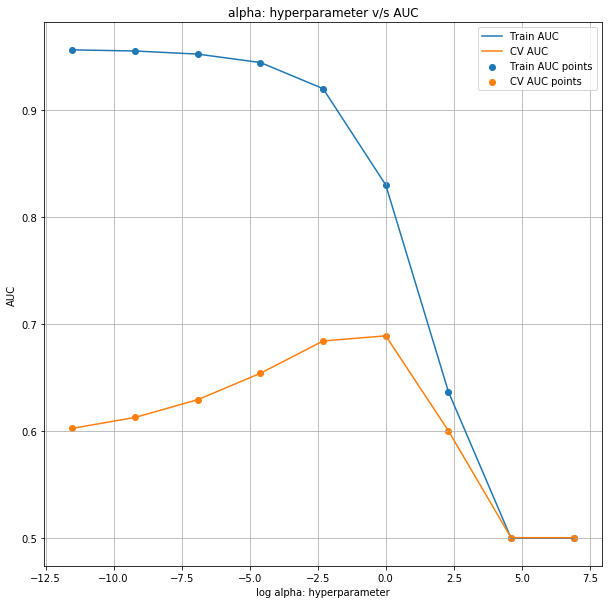

In [89]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import math

train_auc = []
cv_auc = []
log_alphas = []

alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10,  100,  1000]

for i in tqdm(alphas):
    nb = MultinomialNB(alpha = i,class_prior=[0.5,0.5])
    nb.fit(X_train, y_train)

    y_train_pred = batch_predict(nb, X_train)    
    y_cv_pred = batch_predict(nb, X_cv)
    
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

for a in tqdm(alphas):
    b = math.log(a)
    log_alphas.append(b)

plt.figure(figsize=(10,10))
plt.plot(log_alphas, train_auc, label='Train AUC')
plt.plot(log_alphas, cv_auc, label='CV AUC')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC")
plt.grid()
plt.show()


###  Method 2: using GridSearchCV

In [90]:
from sklearn.model_selection import GridSearchCV

nb = MultinomialNB(class_prior=[0.5,0.5])

parameters = {'alpha':[0.00001, 0.0001,0.001, 0.01, 0.1,0.5,0.8, 1, 10,  100,  1000]}

clf = GridSearchCV(nb, parameters, cv= 10, scoring='roc_auc',return_train_score=True)

clf.fit(X_train, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

100%|██████████| 11/11 [00:00<?, ?it/s]

[0.9607576  0.95978978 0.95710089 0.94973431 0.92630661 0.87430753
 0.84871025 0.83511819 0.61332973 0.5        0.5       ]


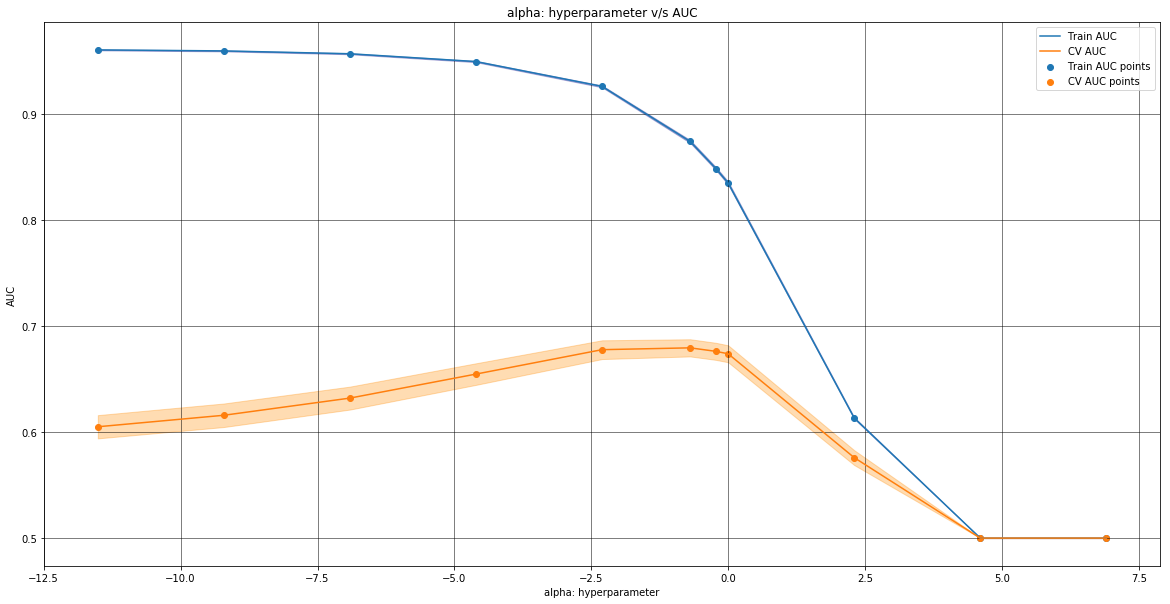

In [91]:
print(train_auc)
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1,0.5,0.8, 1, 10,  100,  1000]
log_alphas =[]

for a in tqdm(alphas):
    b = math.log(a)
    log_alphas.append(b)

plt.figure(figsize=(20,10))

plt.plot(log_alphas, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_alphas,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(log_alphas, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_alphas,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

In [92]:
#Output of GridSearchCV
print('Best score: ',clf.best_score_)
print('alpha value with best score: ',clf.best_params_)
print('='*75)
print('Train AUC scores')
print(clf.cv_results_['mean_train_score'])
print('CV AUC scores')
print(clf.cv_results_['mean_test_score'])

Best score:  0.6795482779410322
alpha value with best score:  {'alpha': 0.5}
Train AUC scores
[0.9607576  0.95978978 0.95710089 0.94973431 0.92630661 0.87430753
 0.84871025 0.83511819 0.61332973 0.5        0.5       ]
CV AUC scores
[0.60506806 0.61591995 0.63212632 0.65478931 0.67782048 0.67954828
 0.67624367 0.67394924 0.57594499 0.5        0.5       ]


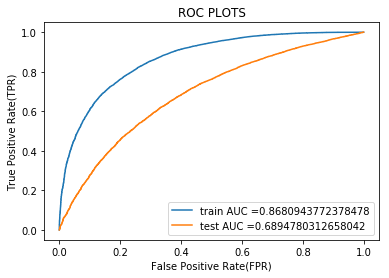

In [93]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


nb = MultinomialNB(alpha=clf.best_params_['alpha'], class_prior=[0.5,0.5])
nb.fit(X_train ,y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred =  nb.predict_proba(X_train)[:,1]#Return probability estimates for the  set1x ,for the class label 1 or +ve.
y_test_pred =  nb.predict_proba(X_test)[:,1]#Return probability estimates for the setcvx,for the class label 1 or +ve .

train_fpr, train_tpr, thresholds = roc_curve(y_train, nb.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ROC PLOTS")
plt.show()

### Confusion Matrix of Train and Test Data

In [94]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [95]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.6113872405661286 for threshold 0.954
Train confusion matrix
[[ 6642   784]
 [15799 25816]]
Test confusion matrix
[[ 3835  1624]
 [12917 17676]]


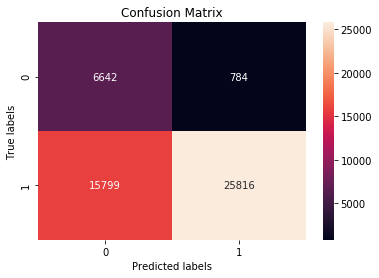

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt   

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), annot=True, ax = ax,fmt='g');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

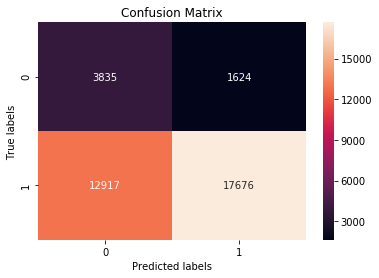

In [97]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), annot=True, ax = ax,fmt='g');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

### Top 20 features  from feature Set 1

In [98]:
All_features = []
All_features = cat_features + subCat_features + essay_features + title_features+ schoolState_features+  teacherPrefix_features+ ['teacher_number_of_previously_posted_projects']+ projectGradeCat_features+ ['price']
print(len(All_features),X_train.shape)

52868 (49041, 52868)


In [108]:
neg_class_prob_sorted = nb.feature_log_prob_[0, :]   #class 0
pos_class_prob_sorted = nb.feature_log_prob_[1, :]   #class1

In [109]:
final_bow_features_neg=pd.DataFrame({'feature_log_prob':neg_class_prob_sorted,'feature_names':All_features})
final_bow_features_pos=pd.DataFrame({'feature_log_prob':pos_class_prob_sorted,'feature_names':All_features})

In [110]:
final_bow_features_neg=final_bow_features_neg.sort_values(by='feature_log_prob',ascending=False)
final_bow_features_pos=final_bow_features_pos.sort_values(by='feature_log_prob',ascending=False)
print('Top 20 negative features ')
final_bow_features_neg.head(20)

Top 20 negative features 


,feature_prob_estimate,feature_names
52867,-4.724322,price
35263,-4.736379,students
24444,-4.773305,nannan
32107,-4.900242,school
21191,-5.084090,learning
52862,-5.124851,teacher_number_of_previously_posted_projects
7306,-5.170286,classroom
25089,-5.188111,not
21175,-5.191758,learn
17191,-5.246070,help


In [111]:
print('Top 20 positive features ')
final_bow_features_pos.head(20)

Top 20 positive features 


,feature_prob_estimate,feature_names
52867,-4.743989,price
35263,-4.750546,students
24444,-4.788833,nannan
32107,-4.901817,school
52862,-5.053081,teacher_number_of_previously_posted_projects
21191,-5.104149,learning
7306,-5.126020,classroom
25089,-5.187555,not
21175,-5.206531,learn
17191,-5.261275,help


## Set 2: categorical, numerical features + preprocessed_eassay (TFIDF)

In [72]:
# Please write all the code with proper documentation

X_train = hstack((train_categories_one_hot, train_subcategories_one_hot, train_essay_tfidf, train_title_tfidf, train_school_state_category_one_hot,train_teacher_prefix_categories_one_hot, previously_posted_projects_normalized_train, train_project_grade_category_one_hot, price_normalized_train)).tocsr()
X_cv = hstack((cv_categories_one_hot, cv_subcategories_one_hot, cv_essay_tfidf, cv_title_tfidf, cv_school_state_category_one_hot, cv_teacher_prefix_categories_one_hot, previously_posted_projects_normalized_cv, cv_project_grade_category_one_hot, price_normalized_cv)).tocsr()
X_test = hstack((test_categories_one_hot, test_subcategories_one_hot, test_essay_tfidf, test_title_tfidf, test_school_state_category_one_hot, test_teacher_prefix_categories_one_hot, previously_posted_projects_normalized_test, test_project_grade_category_one_hot, price_normalized_test)).tocsr()

print("Final Data matrix")
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

Final Data matrix
(49041, 14200) (49041,)
(24155, 14200) (24155,)
(36052, 14200) (36052,)


100%|██████████| 9/9 [00:00<?, ?it/s]


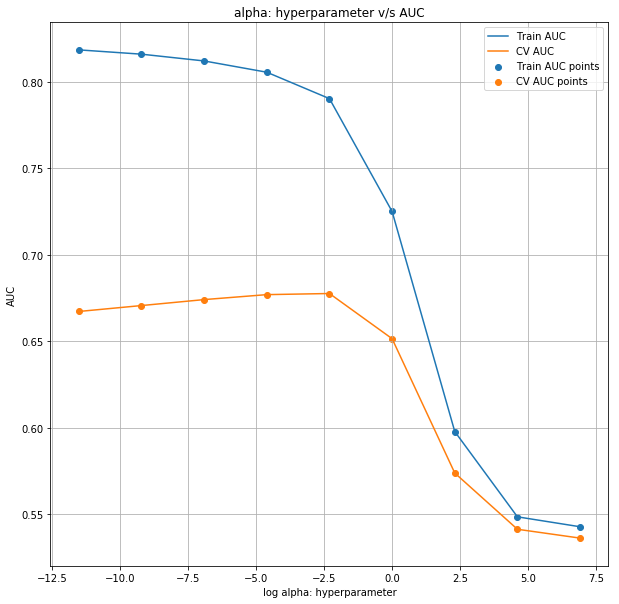

In [73]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import math

train_auc = []
cv_auc = []
log_alphas = []

alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10,  100,  1000]

for i in tqdm(alphas):
    nb = MultinomialNB(alpha = i,class_prior=[0.5,0.5])
    nb.fit(X_train, y_train)

    y_train_pred = batch_predict(nb, X_train)    
    y_cv_pred = batch_predict(nb, X_cv)
    

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

for a in tqdm(alphas):
    b = math.log(a)
    log_alphas.append(b)

plt.figure(figsize=(10,10))
plt.plot(log_alphas, train_auc, label='Train AUC')
plt.plot(log_alphas, cv_auc, label='CV AUC')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC")
plt.grid()
plt.show()


In [74]:
from sklearn.model_selection import GridSearchCV

nb = MultinomialNB(class_prior=[0.5,0.5])

parameters = {'alpha':[0.00001, 0.0001,0.001, 0.01, 0.1,0.5,0.8, 1, 10,  100,  1000]}

clf = GridSearchCV(nb, parameters, cv= 10, scoring='roc_auc',return_train_score=True)

clf.fit(X_train, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

100%|██████████| 11/11 [00:00<00:00, 11061.46it/s]


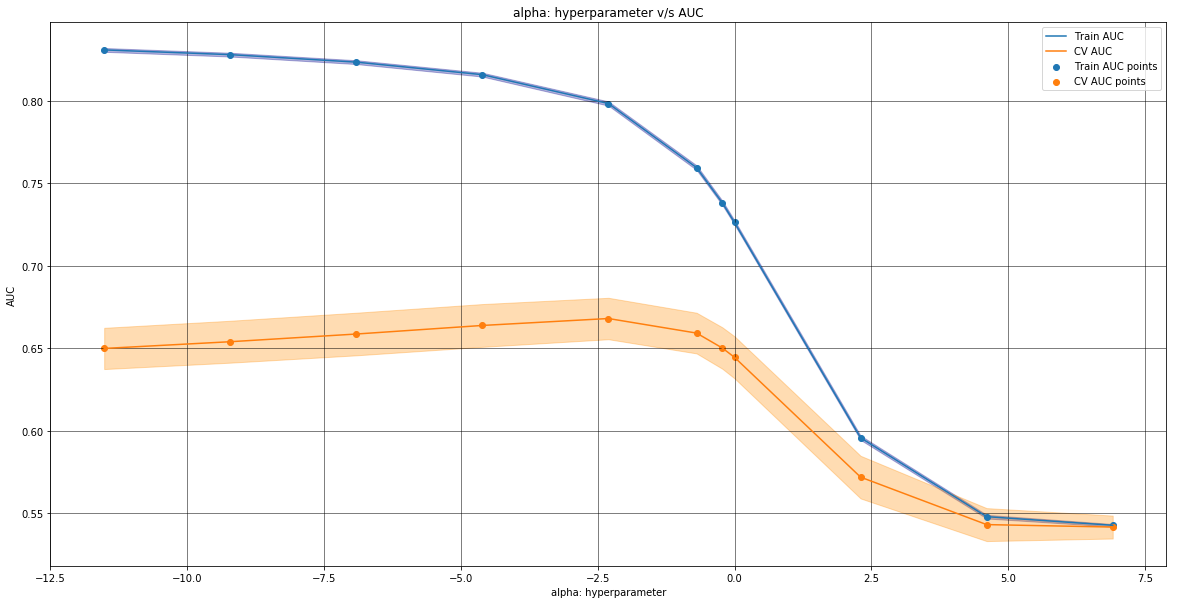

In [75]:
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1,0.5,0.8, 1, 10,  100,  1000]
log_alphas =[]

for a in tqdm(alphas):
    b = math.log(a)
    log_alphas.append(b)

plt.figure(figsize=(20,10))

plt.plot(log_alphas, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_alphas,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(log_alphas, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_alphas,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

In [76]:
#Output of GridSearchCV
print('Best score: ',clf.best_score_)
print('alpha value with best score: ',clf.best_params_)
print('='*75)
print('Train AUC scores')
print(clf.cv_results_['mean_train_score'])
print('CV AUC scores')
print(clf.cv_results_['mean_test_score'])

Best score:  0.6680770084319895
alpha value with best score:  {'alpha': 0.1}
Train AUC scores
[0.83080004 0.8279336  0.82339061 0.81580211 0.7983196  0.7594851
 0.73817956 0.72625005 0.59583795 0.54804599 0.54282266]
CV AUC scores
[0.64994818 0.65401886 0.65868093 0.6638743  0.66807701 0.65925554
 0.65021269 0.64456438 0.57199472 0.54323098 0.54174663]


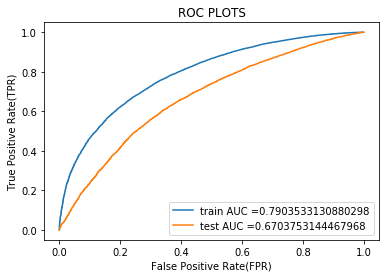

In [77]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


nb = MultinomialNB(alpha=clf.best_params_['alpha'], class_prior=[0.5,0.5])
nb.fit(X_train ,y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred =  nb.predict_proba(X_train)[:,1]#Return probability estimates for the  set1x ,for the class label 1 or +ve.
y_test_pred =  nb.predict_proba(X_test)[:,1]#Return probability estimates for the setcvx,for the class label 1 or +ve .

train_fpr, train_tpr, thresholds = roc_curve(y_train, nb.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ROC PLOTS")
plt.show()

### Confusion Matrix of Train and Test Data

In [78]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [79]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.5097782440638458 for threshold 0.523
Train confusion matrix
[[ 5538  1888]
 [13211 28404]]
Test confusion matrix
[[ 3291  2168]
 [10473 20120]]


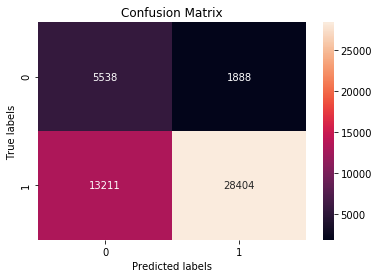

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt   

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), annot=True, ax = ax,fmt='g');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

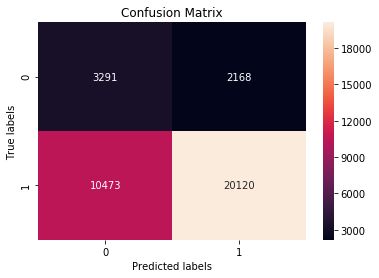

In [81]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), annot=True, ax = ax,fmt='g');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

In [119]:
from prettytable import PrettyTable
pt=PrettyTable(['Vectorizer','Model','Hyperparameter(Alpha)','Train AUC','Test AUC'])
pt.add_row(['BoW','Multinomial Naive Bayes',0.5,0.8680943,0.6894780])
pt.add_row(['Tfidf','Multinomial Naive Bayes',0.1,0.7903533,0.6703753])
print(pt)

+------------+-------------------------+-----------------------+-----------+-----------+
| Vectorizer |          Model          | Hyperparameter(Alpha) | Train AUC |  Test AUC |
+------------+-------------------------+-----------------------+-----------+-----------+
|    BoW     | Multinomial Naive Bayes |          0.5          | 0.8680943 |  0.689478 |
|   Tfidf    | Multinomial Naive Bayes |          0.1          | 0.7903533 | 0.6703753 |
+------------+-------------------------+-----------------------+-----------+-----------+
